In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

RAW_DATA = pd.read_csv("decay_data/mono_decay.csv")

Tau = RAW_DATA["TAU"]
Intensity = RAW_DATA["INTENSITY"]


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


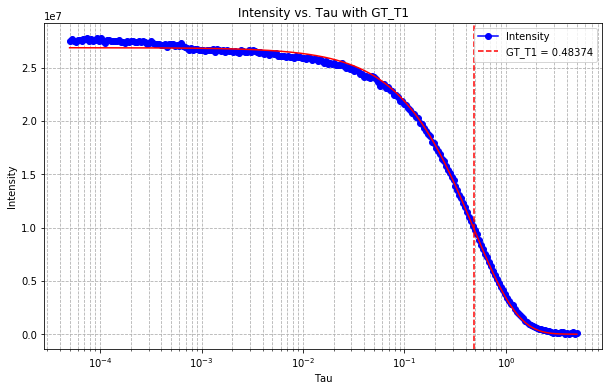

In [25]:
from scipy.optimize import curve_fit
import numpy as np

def mono_exp(t, S1, T1):
    return S1 * np.exp(-t / T1)

# Use curve_fit to fit the model to the data
params, covariance = curve_fit(mono_exp, Tau, Intensity, p0=[0.5, Tau[0]])

# Extract S1 and T1 from the fitted parameters
GT_S1, GT_T1 = params


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Tau, Intensity, 'bo-', label='Intensity')  # 'bo-' for blue circle markers with solid line
plt.plot(Tau, mono_exp(Tau, GT_S1, GT_T1), color='red')
plt.xlabel('Tau')
plt.ylabel('Intensity')
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.grid(True, which="both", ls="--")

# Add a vertical line for GT_T1
plt.axvline(x=GT_T1, color='r', linestyle='--', label=f'GT_T1 = {round(GT_T1, 5)}')  # 'r--' for red dashed line

plt.title('Intensity vs. Tau with GT_T1')
plt.legend()  # Show legend
plt.show()


In [31]:
Tau_128, Intensity_128 = Tau[::2], Intensity[::2]

# Set initial values for GT_S1 and GT_T1
initial_values = [0.5, Intensity_128[0]]

# Use curve_fit to fit the model to the data, with initial values
params, _ = curve_fit(mono_exp, Tau_128, Intensity_128, p0=initial_values)


# Extract S1_128 and T1_128 from the fitted parameters
S1_128, T1_128 = params

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Tau_128, Intensity_128, 'bo', label='Intensity_128')
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.xlabel('Tau_128')
plt.ylabel('Intensity_128')
plt.title('Intensity_128 vs. Tau_128 with T1_128 Vertical Line')
plt.axvline(x=T1_128, color='r', linestyle='--', label=f'T1_128 = {T1_128}')  # Plot vertical line at T1_128
plt.legend()
plt.grid(True, which="both", ls="--")





plt.text(0.5, 0.5, 'p-value=0.5', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [59]:
from scipy.stats import ttest_ind
# Assuming Tau, GT_S1, GT_T1, S1_128, T1_128 are already defined
# Compute expected curve values based on GT_S1, GT_T1
curve_value_expected = np.array(mono_exp(Tau, GT_S1, GT_T1))

# Compute experimental curve values based on S1_128, T1_128
curve_values_128 = np.array(mono_exp(Tau, S1_128, T1_128))

# Perform T-test
t_stat, p_value_128 = ttest_ind(curve_value_expected, curve_values_128)

print(f"T-statistic: {t_stat}, P-value: {p_value_128}")

T-statistic: -0.0003804149441498104, P-value: 0.9996966215479872


Our P-Value is > 0.05, so these are statistically the same curves. Lets continue the analysis, having our data again

In [60]:

# Halving the halved number of data points in Tau_128 and Intensity_128
Tau_64 = Tau_128[::2]  # Select every other element from Tau_128
Intensity_64 = Intensity_128[::2]  # Select every other element from Intensity_128

# Set initial values for S1_64 and T1_64, possibly based on previous fits or some heuristic
initial_values_64 = [Intensity_64[0], 0.5]

# Use curve_fit to fit the model to the further reduced data, with initial values
params_64, _ = curve_fit(mono_exp, Tau_64, Intensity_64, p0=initial_values_64)

# Extract S1_64 and T1_64 from the fitted parameters
S1_64, T1_64 = params_64

# Compute curve values using S1_256 and T1_256
curve_values_256 = mono_exp(Tau, GT_S1, GT_T1)

# Compute curve values using S1_64 and T1_64
# Note: Ensure Tau used here matches the one used for curve_values_256 in terms of data points
curve_values_64 = mono_exp(Tau, S1_64, T1_64)

# Perform T-test
t_stat, p_value_64 = ttest_ind(curve_values_256, curve_values_64)

print(f"T-statistic: {t_stat}, P-value: {p_value_64}")



T-statistic: -0.008570989287414696, P-value: 0.993164775289683


In [61]:
# Further halving the number of data points in Tau_64 and Intensity_64
Tau_32 = Tau_64[::2]  # Select every other element from Tau_64
Intensity_32 = Intensity_64[::2]  # Select every other element from Intensity_64
#initial values for S1_32 and T1_32, possibly based on previous fits or some heuristic
initial_values_32 = [Intensity_32[0], 0.5]

# Use curve_fit to fit the model to the further reduced data, with initial values
params_32, _ = curve_fit(mono_exp, Tau_32, Intensity_32, p0=initial_values_32)

# Extract S1_32 and T1_32 from the fitted parameters
S1_32, T1_32 = params_32

print(T1_32, S1_32)

curve_values_256 = mono_exp(Tau, GT_S1, GT_T1)
curve_values_32 = mono_exp(Tau, S1_32, T1_32)

# Perform T-test between curve_values_32 and curve_values_64_on_32
t_stat, p_value_32 = ttest_ind(curve_values_256, curve_values_32)

print(f"T-statistic: {t_stat}, P-value: {p_value_32}")



0.48140379319709176 26942691.656459562
T-statistic: -0.04209398910122874, P-value: 0.9664402462372503


In [80]:
# Halving the number of data points in Tau_32 and Intensity_32 to get Tau_16 and Intensity_16
Tau_16 = Tau_32[::2]  # Select every other element from Tau_32
Intensity_16 = Intensity_32[::2]  # Select every other element from Intensity_32

# Set initial values for S1_16 and T1_16, possibly based on previous fits or some heuristic
initial_values_16 = [Intensity_16[0], 0.5]

# Use curve_fit to fit the model to the further reduced data, with initial values
params_16, _ = curve_fit(mono_exp, Tau_16, Intensity_16, p0=initial_values_16)

# Extract S1_16 and T1_16 from the fitted parameters
S1_16, T1_16 = params_16


curve_values_16 = mono_exp(Tau_16, S1_16, T1_16)

# Perform T-test between curve_values_16 and curve_values_32_on_16
t_stat, p_value_16 = ttest_ind(curve_values_256, curve_values_16)

print(f"T-statistic: {t_stat}, P-value: {p_value_16}")

T-statistic: -0.326672214270374, P-value: 0.7441689062324994


In [81]:
# Halving the number of data points in Tau_16 and Intensity_16 to get Tau_8 and Intensity_8
Tau_8 = Tau_16[::2]  # Select every other element from Tau_16
Intensity_8 = Intensity_16[::2]  # Select every other element from Intensity_16
# Set initial values for S1_8 and T1_8, possibly based on previous fits or some heuristic
initial_values_8 = [Intensity_8[0], 0.5]

# Use curve_fit to fit the model to the reduced data, with initial values
params_8, _ = curve_fit(mono_exp, Tau_8, Intensity_8, p0=initial_values_8)

# Extract S1_8 and T1_8 from the fitted parameters
S1_8, T1_8 = params_8

curve_values_8 = mono_exp(Tau, S1_8, T1_8)


# Perform T-test between curve_values_8 and curve_values_16_on_8
t_stat, p_value_8 = ttest_ind(curve_values_256, curve_values_8)

print(f"T-statistic: {t_stat}, P-value: {p_value_8}")


T-statistic: -0.044581119983944144, P-value: 0.9644586413359171


In [74]:
# Halving the number of data points in Tau_8 and Intensity_8 to get Tau_4 and Intensity_4
Tau_4 = Tau_8[::2]  # Select every other element from Tau_8
Intensity_4 = Intensity_8[::2]  # Select every other element from Intensity_8
# Set initial values for S1_4 and T1_4, possibly based on previous fits or some heuristic
initial_values_4 = [Intensity_4[0], 0.5]

# Use curve_fit to fit the model to the reduced data, with initial values
params_4, _ = curve_fit(mono_exp, Tau_4, Intensity_4, p0=initial_values_4)

# Extract S1_4 and T1_4 from the fitted parameters
S1_4, T1_4 = params_4
# Compute curve values using S1_4 and T1_4 for Tau_4
curve_values_4 = mono_exp(Tau, S1_4, T1_4)

# Perform T-test between curve_values_4 and curve_values_8_on_4
t_stat, p_value_4 = ttest_ind(curve_values_256, curve_values_4)

print(f"T-statistic: {t_stat}, P-value: {p_value_4}")



T-statistic: 0.009925326694799291, P-value: 0.9920847463211918


In [75]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Tau, curve_values_256, label='Curve 256')
plt.plot(Tau, curve_values_128, label='Curve 128')
plt.plot(Tau, curve_values_64, label='Curve 64')
plt.plot(Tau, curve_values_32, label='Curve 32')
plt.plot(Tau, curve_values_8, label='Curve 8')
plt.plot(Tau, curve_values_4, label='Curve 4')

plt.xlabel('Tau')
plt.ylabel('Intensity')
plt.title('Comparison of Curve Values at Different Resolutions')
plt.legend()
plt.xscale("log")
plt.grid(True)
plt.show()

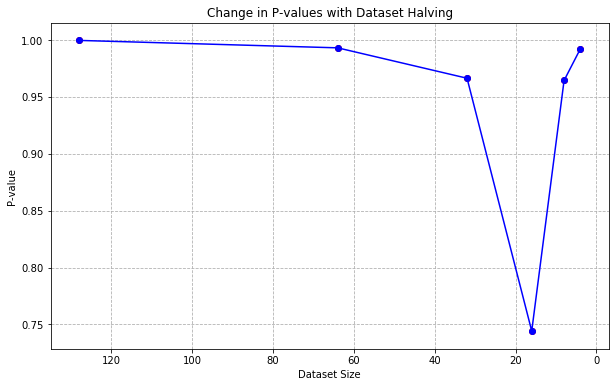

In [82]:
import matplotlib.pyplot as plt

# Assuming p_value_128, p_value_64, p_value_32, p_value_8, p_value_4 are already defined
p_values = [p_value_128, p_value_64, p_value_32, p_value_16, p_value_8, p_value_4]
sizes = [128, 64, 32, 16, 8, 4]  # Corresponding sizes of the datasets

plt.figure(figsize=(10, 6))
plt.plot(sizes, p_values, marker='o', linestyle='-', color='b')
plt.scatter(sizes, p_values, color='r')  # To highlight each point

plt.xlabel('Dataset Size')
plt.ylabel('P-value')
plt.title('Change in P-values with Dataset Halving')
plt.grid(True, which="both", ls="--")
plt.gca().invert_xaxis()  # Optional: Invert x-axis to show decreasing dataset size from left to right
plt.show()